In [93]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [94]:
test = pd.read_csv('queue_dataset_test.csv')
train = pd.read_csv('queue_dataset_train.csv')
train_samp = pd.read_csv('queue_dataset_train_small_sample.csv')
bas_sub = pd.read_csv('baseline_submission.csv')

In [95]:
test.head()

,id,date,branch_name,customer_gender,customer_age_appl,customer_city,service_name_organization,service_name,service_name_2,time_start_process,operator_count,previous_customer_count
0,0,2020-01-14,Masallı ASAN,M,31-35,OTHERS,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,10:26:43.0000000,5,1.0
1,1,2020-01-19,Masallı ASAN,M,0-5,KÜRDƏMİR,Daxili İşlər Nazirliyi,Şəxsiyyət vəsiqələrinin verilməsi və dəyişdiri...,Şəxsiyyət vəsiqəsi və arayışların verilməsi,11:36:40.0000000,6,5.0
2,2,2020-01-14,Masallı ASAN,F,6-10,KÜRDƏMİR,Daxili İşlər Nazirliyi,Şəxsiyyət vəsiqələrinin verilməsi və dəyişdiri...,Şəxsiyyət vəsiqəsi və arayışların verilməsi,17:21:27.0000000,6,3.0
3,3,2020-01-25,Masallı ASAN,F,16-20,OTHERS,Ədliyyə Nazirliyi,İmzanın təsdiqi,Notariat fəaliyyəti,10:23:28.0000000,3,0.0
4,4,2020-02-19,Masallı ASAN,M,11-15,KÜRDƏMİR,Funksional Yardımçı xidmətlər,"Tibbi arayışların verilməsi (qan qrupu, boyun ...",Tibb xidmətləri,15:35:03.0000000,1,0.0


In [96]:
train.head()

,id,date,branch_name,customer_gender,customer_age_appl,customer_city,service_name_organization,service_name,service_name_2,time_start_process,operator_count,previous_customer_count,service_canceled
0,0,2019-07-04,Masallı ASAN,F,36-40,OTHERS,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,11:27:32.0000000,5,0.0,0
1,1,2019-04-17,Masallı ASAN,M,16-20,OTHERS,Vergilər Nazirliyi,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,11:44:04.0000000,3,0.0,0
2,2,2019-07-10,Masallı ASAN,M,36-40,BAKI,Ədliyyə Nazirliyi,Etibarnamə,Notariat fəaliyyəti,12:14:28.0000000,4,0.0,0
3,3,2019-08-16,Masallı ASAN,F,26-30,BAKI,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,14:45:34.0000000,5,1.0,0
4,4,2019-09-24,Masallı ASAN,F,66-70,OTHERS,Ədliyyə Nazirliyi,İmzanın təsdiqi,Notariat fəaliyyəti,15:41:37.0000000,5,3.0,0


In [97]:
train_samp.head()

,id,date,branch_name,customer_gender,customer_age_appl,customer_city,service_name_organization,service_name,service_name_2,time_start_process,operator_count,previous_customer_count,service_canceled
0,0,2019-07-04,Masallı ASAN,F,36-40,OTHERS,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,11:27:32.0000000,5,0.0,0
1,1,2019-04-17,Masallı ASAN,M,16-20,OTHERS,Vergilər Nazirliyi,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,11:44:04.0000000,3,0.0,0
2,2,2019-07-10,Masallı ASAN,M,36-40,BAKI,Ədliyyə Nazirliyi,Etibarnamə,Notariat fəaliyyəti,12:14:28.0000000,4,0.0,0
3,3,2019-08-16,Masallı ASAN,F,26-30,BAKI,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,14:45:34.0000000,5,1.0,0
4,4,2019-09-24,Masallı ASAN,F,66-70,OTHERS,Ədliyyə Nazirliyi,İmzanın təsdiqi,Notariat fəaliyyəti,15:41:37.0000000,5,3.0,0


In [98]:
train.describe()

,id,operator_count,previous_customer_count,service_canceled
count,4.510024e+06,4.510024e+06,4.510024e+06,4.510024e+06
mean,2.255012e+06,4.251089e+00,5.088331e+00,7.959581e-02
std,1.301932e+06,2.359285e+00,8.535608e+00,2.706665e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.127506e+06,2.000000e+00,0.000000e+00,0.000000e+00
50%,2.255012e+06,4.000000e+00,2.000000e+00,0.000000e+00
75%,3.382517e+06,6.000000e+00,6.000000e+00,0.000000e+00
max,4.510023e+06,1.200000e+01,1.430000e+02,1.000000e+00


In [99]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510024 entries, 0 to 4510023
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   date                       object 
 2   branch_name                object 
 3   customer_gender            object 
 4   customer_age_appl          object 
 5   customer_city              object 
 6   service_name_organization  object 
 7   service_name               object 
 8   service_name_2             object 
 9   time_start_process         object 
 10  operator_count             int64  
 11  previous_customer_count    float64
 12  service_canceled           int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 447.3+ MB


In [100]:
train.isnull().sum()

id                               0
date                             0
branch_name                      0
customer_gender                  0
customer_age_appl            32616
customer_city                    0
service_name_organization        0
service_name                     0
service_name_2                   0
time_start_process           29213
operator_count                   0
previous_customer_count          0
service_canceled                 0
dtype: int64

In [101]:
train.count()

id                           4510024
date                         4510024
branch_name                  4510024
customer_gender              4510024
customer_age_appl            4477408
customer_city                4510024
service_name_organization    4510024
service_name                 4510024
service_name_2               4510024
time_start_process           4480811
operator_count               4510024
previous_customer_count      4510024
service_canceled             4510024
dtype: int64

<AxesSubplot:>

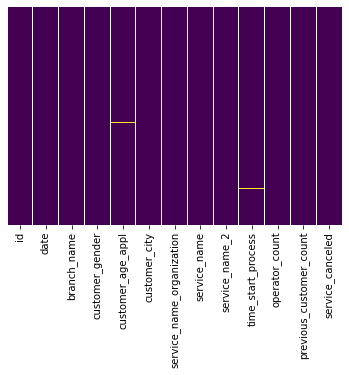

In [102]:
import seaborn as sns
sns.heatmap(train_samp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [103]:
train.rename(columns={'id': 'id', 
                   'date': "Müraciət_tarixi",
                    'branch_name': 'Mərkəzin_adı', 
                    'customer_gender': 'Cinsi', 
                    'customer_age_appl': 'Yaşı', 
                    'customer_city':'Qeydiyyat_ünvanı',
                    'service_name_organization': 'Dövlət_orqanı', 
                    'service_name': 'Xidmətin_adı_üst', 
                    'service_name_2': 'Xidmətin_adı_alt', 
                    'time_start_process': 'Müraciət_etmə_tarixi',
                    'operator_count': 'Operator_sayı', 
                    'previous_customer_count': 'Növbədəki_şəxslər', 
                    'service_canceled': 'İmtina'}, inplace=True)
train.head()

,id,Müraciət_tarixi,Mərkəzin_adı,Cinsi,Yaşı,Qeydiyyat_ünvanı,Dövlət_orqanı,Xidmətin_adı_üst,Xidmətin_adı_alt,Müraciət_etmə_tarixi,Operator_sayı,Növbədəki_şəxslər,İmtina
0,0,2019-07-04,Masallı ASAN,F,36-40,OTHERS,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,11:27:32.0000000,5,0.0,0
1,1,2019-04-17,Masallı ASAN,M,16-20,OTHERS,Vergilər Nazirliyi,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,Kommersiya hüquqi şəxslərin və vergi ödəyicilə...,11:44:04.0000000,3,0.0,0
2,2,2019-07-10,Masallı ASAN,M,36-40,BAKI,Ədliyyə Nazirliyi,Etibarnamə,Notariat fəaliyyəti,12:14:28.0000000,4,0.0,0
3,3,2019-08-16,Masallı ASAN,F,26-30,BAKI,Daxili İşlər Nazirliyi,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,Ümumvətəndaş pasportlarının verilməsi və dəyiş...,14:45:34.0000000,5,1.0,0
4,4,2019-09-24,Masallı ASAN,F,66-70,OTHERS,Ədliyyə Nazirliyi,İmzanın təsdiqi,Notariat fəaliyyəti,15:41:37.0000000,5,3.0,0


In [104]:
train['Cinsi']

0          F
1          M
2          M
3          F
4          F
          ..
4510019    F
4510020    M
4510021    F
4510022    F
4510023    F
Name: Cinsi, Length: 4510024, dtype: object

In [105]:
cinsi = pd.get_dummies(train['Cinsi'],drop_first=True)
mərkəzin_adı = pd.get_dummies(train['Mərkəzin_adı'],drop_first=True)



In [106]:
qeydiyyat_ünvanı = pd.get_dummies(train['Qeydiyyat_ünvanı'],drop_first=True)
dövlət_orqanı = pd.get_dummies(train['Dövlət_orqanı'],drop_first=True)



In [107]:
xidmətin_adı_üst = pd.get_dummies(train['Xidmətin_adı_üst'],drop_first=True)
xidmətin_adı_alt = pd.get_dummies(train['Xidmətin_adı_alt'],drop_first=True)


In [108]:
yaşı = pd.get_dummies(train['Yaşı'],drop_first=True)


In [109]:
train.drop(['Müraciət_tarixi','Müraciət_etmə_tarixi','Yaşı'],axis=1,inplace=True)
train.drop(['Cinsi','Mərkəzin_adı','Dövlət_orqanı','Qeydiyyat_ünvanı','Xidmətin_adı_üst','Xidmətin_adı_alt'],axis=1,inplace=True)
train = pd.concat([train,cinsi,mərkəzin_adı,qeydiyyat_ünvanı,dövlət_orqanı,xidmətin_adı_üst,xidmətin_adı_alt],axis=1)
train.head()

,id,Operator_sayı,Növbədəki_şəxslər,İmtina,M,2 saylı ASAN,3 saylı ASAN,4 saylı ASAN,5 saylı ASAN,Bərdə ASAN,...,Mobil Operatorlar,Məhkumluq barədə arayışların verilməsi,Notariat fəaliyyəti,Sürücülük vəsiqələrinin dəyişdirilməsi,Tibb xidmətləri,Tərcümə,Vətəndaşlıq vəziyyəti aktlarinin dövlət qeydiyyati,Ümumvətəndaş pasportlarının verilməsi və dəyişdirilməsi,Şəxsiyyət vəsiqəsi və arayışların verilməsi,Əmək pensiyalarinin təyin edilməsi
0,0,5,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,3,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,5,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,5,3.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('İmtina',axis=1), 
           train['İmtina'], test_size=0.30, 
            random_state=101)

In [112]:
X_train.head()

,id,Operator_sayı,Növbədəki_şəxslər,M,2 saylı ASAN,3 saylı ASAN,4 saylı ASAN,5 saylı ASAN,Bərdə ASAN,Gəncə ASAN,...,Mobil Operatorlar,Məhkumluq barədə arayışların verilməsi,Notariat fəaliyyəti,Sürücülük vəsiqələrinin dəyişdirilməsi,Tibb xidmətləri,Tərcümə,Vətəndaşlıq vəziyyəti aktlarinin dövlət qeydiyyati,Ümumvətəndaş pasportlarının verilməsi və dəyişdirilməsi,Şəxsiyyət vəsiqəsi və arayışların verilməsi,Əmək pensiyalarinin təyin edilməsi
142346,142346,5,8.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4034606,4034606,6,0.0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3575850,3575850,6,12.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
723407,723407,4,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2586186,2586186,5,0.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [113]:
X_test.head()

,id,Operator_sayı,Növbədəki_şəxslər,M,2 saylı ASAN,3 saylı ASAN,4 saylı ASAN,5 saylı ASAN,Bərdə ASAN,Gəncə ASAN,...,Mobil Operatorlar,Məhkumluq barədə arayışların verilməsi,Notariat fəaliyyəti,Sürücülük vəsiqələrinin dəyişdirilməsi,Tibb xidmətləri,Tərcümə,Vətəndaşlıq vəziyyəti aktlarinin dövlət qeydiyyati,Ümumvətəndaş pasportlarının verilməsi və dəyişdirilməsi,Şəxsiyyət vəsiqəsi və arayışların verilməsi,Əmək pensiyalarinin təyin edilməsi
1439303,1439303,1,1.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2100638,2100638,2,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1835817,1835817,5,6.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1396285,1396285,3,6.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477222,1477222,7,38.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [114]:
train.corr()

,id,Operator_sayı,Növbədəki_şəxslər,İmtina,M,2 saylı ASAN,3 saylı ASAN,4 saylı ASAN,5 saylı ASAN,Bərdə ASAN,...,Mobil Operatorlar,Məhkumluq barədə arayışların verilməsi,Notariat fəaliyyəti,Sürücülük vəsiqələrinin dəyişdirilməsi,Tibb xidmətləri,Tərcümə,Vətəndaşlıq vəziyyəti aktlarinin dövlət qeydiyyati,Ümumvətəndaş pasportlarının verilməsi və dəyişdirilməsi,Şəxsiyyət vəsiqəsi və arayışların verilməsi,Əmək pensiyalarinin təyin edilməsi
id,1.000000,0.021413,0.018862,0.037627,-0.013411,-0.392469,-0.206677,0.268346,0.072274,0.138205,...,-0.021879,-0.002802,0.013193,0.001505,-0.026824,-0.031334,0.003246,0.020537,0.013991,-0.002879
Operator_sayı,0.021413,1.000000,0.432738,0.102640,-0.090581,0.058918,-0.005875,0.048060,0.064652,-0.027291,...,-0.136582,-0.173039,0.099354,-0.228230,-0.312606,-0.218772,-0.162757,0.232717,0.544543,-0.140648
Növbədəki_şəxslər,0.018862,0.432738,1.000000,0.130171,-0.080186,0.040494,0.029619,0.050227,-0.042322,-0.062183,...,-0.016225,-0.086837,-0.123359,-0.087584,-0.097582,-0.090867,-0.124400,0.158684,0.355907,-0.064346
İmtina,0.037627,0.102640,0.130171,1.000000,0.002923,0.022307,0.012908,0.011432,0.000792,-0.017797,...,0.027454,-0.038346,0.071495,-0.019183,-0.036884,-0.007520,-0.038290,-0.031352,0.067430,-0.024415
M,-0.013411,-0.090581,-0.080186,0.002923,1.000000,0.007515,-0.019785,-0.003856,0.001139,0.028030,...,0.035466,0.068216,0.059467,0.111329,-0.052876,0.009471,0.041845,-0.048330,-0.114840,-0.014112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tərcümə,-0.031334,-0.218772,-0.090867,-0.007520,0.009471,0.015337,0.040884,0.018116,0.012271,0.007747,...,-0.025928,-0.037373,-0.095760,-0.035032,-0.048124,1.000000,-0.050575,-0.098242,-0.128059,-0.024465
Vətəndaşlıq vəziyyəti aktlarinin dövlət qeydiyyati,0.003246,-0.162757,-0.124400,-0.038290,0.041845,-0.010603,0.016324,-0.002996,0.004233,-0.005395,...,-0.029316,-0.042257,-0.108275,-0.039610,-0.054414,-0.050575,1.000000,-0.111082,-0.144796,-0.027662
Ümumvətəndaş pasportlarının verilməsi və dəyişdirilməsi,0.020537,0.232717,0.158684,-0.031352,-0.048330,0.013660,0.013023,0.004912,-0.007994,-0.019849,...,-0.056947,-0.082084,-0.210324,-0.076943,-0.105698,-0.098242,-0.111082,1.000000,-0.281264,-0.053733
Şəxsiyyət vəsiqəsi və arayışların verilməsi,0.013991,0.544543,0.355907,0.067430,-0.114840,-0.009496,-0.048597,0.022254,0.028189,-0.017818,...,-0.074231,-0.106997,-0.274159,-0.100296,-0.137778,-0.128059,-0.144796,-0.281264,1.000000,-0.070041


<AxesSubplot:>

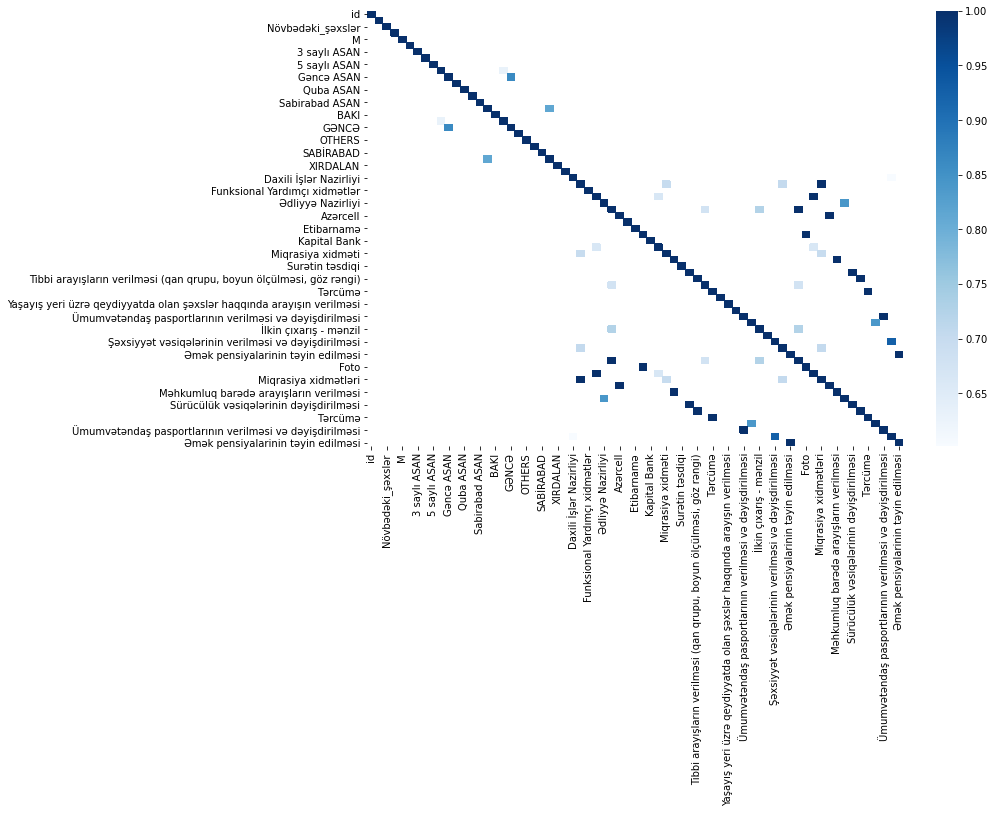

In [115]:
corr = train.corr()

kot = corr[corr>=.6]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [117]:
#predictions
predictions = logmodel.predict(X_test)

In [118]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96   1244692
           1       0.00      0.00      0.00    108316

    accuracy                           0.92   1353008
   macro avg       0.46      0.50      0.48   1353008
weighted avg       0.85      0.92      0.88   1353008



In [120]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[1244692       0]
 [ 108316       0]]


In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,predictions)

0.5

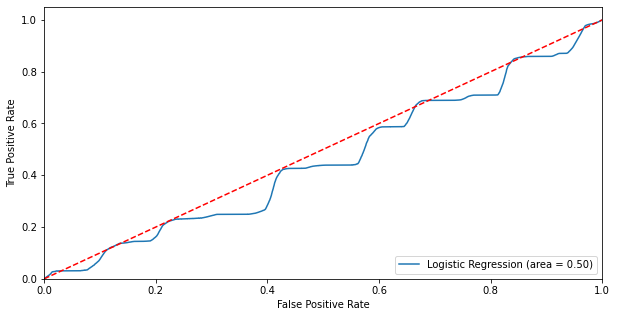

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB

In [124]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [125]:
predicted = NBmodel.predict(X_test)

In [126]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [128]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[1244692       0]
 [ 108316       0]]


In [130]:
print('Accuracy Score for Naive Bayes:',score2 )

Accuracy Score for Naive Bayes: 0.9199443018814375


In [131]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.92      1.00      0.96   1244692
           1       0.00      0.00      0.00    108316

    accuracy                           0.92   1353008
   macro avg       0.46      0.50      0.48   1353008
weighted avg       0.85      0.92      0.88   1353008



In [132]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.5


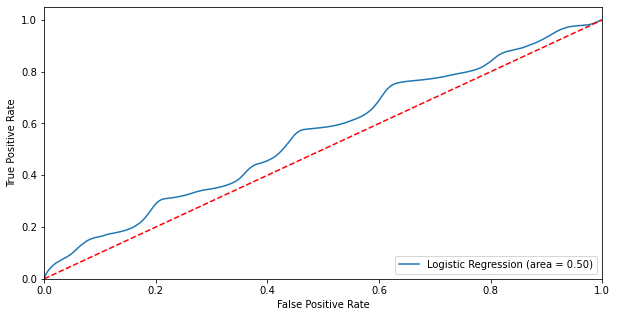

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
y_pred = classifier.predict(X_test)

In [136]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [137]:
y_test

1439303    0
2100638    0
1835817    1
1396285    0
1477222    0
          ..
4252391    0
1003668    0
2898057    0
174164     0
3153422    0
Name: İmtina, Length: 1353008, dtype: int64

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[1221413   23279]
 [  51461   56855]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97   1244692
           1       0.71      0.52      0.60    108316

    accuracy                           0.94   1353008
   macro avg       0.83      0.75      0.79   1353008
weighted avg       0.94      0.94      0.94   1353008



In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,predictions)

0.5

# SVM


In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print("Classification Report for SVM:""\n",metrics.classification_report(y_test, y_pred))